<center><h1>Project Title - EpiRecipes Visualization Application by Sunny Tiwari</h1></center>

<center><h2>Task 1: Data Cleaning and Preprocessing</h2></center>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df_csv = pd.read_csv("C:/Users/HP/Downloads/Forage/archive/epi_r.csv")

In [24]:
# Check the shape of the CSV DataFrame
print(df_csv.shape)

(20052, 680)


In [26]:
# Check the information of the CSV DataFrame
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [28]:
# Generate descriptive statistics
print(df_csv.describe())


             rating      calories        protein           fat        sodium  \
count  20052.000000  1.593500e+04   15890.000000  1.586900e+04  1.593300e+04   
mean       3.714467  6.322958e+03     100.160793  3.468775e+02  6.225975e+03   
std        1.340829  3.590460e+05    3840.318527  2.045611e+04  3.333182e+05   
min        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%        3.750000  1.980000e+02       3.000000  7.000000e+00  8.000000e+01   
50%        4.375000  3.310000e+02       8.000000  1.700000e+01  2.940000e+02   
75%        4.375000  5.860000e+02      27.000000  3.300000e+01  7.110000e+02   
max        5.000000  3.011122e+07  236489.000000  1.722763e+06  2.767511e+07   

          #cakeweek    #wasteless  22-minute meals  3-ingredient recipes  \
count  20052.000000  20052.000000     20052.000000          20052.000000   
mean       0.000299      0.000050         0.000848              0.001346   
std        0.017296      0.007062         0.029105 

In [29]:
# Identify missing data in CSV DataFrame
print("\nMissing data in CSV DataFrame:")
missing_data = df_csv.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)

# Identify duplicate entries in CSV DataFrame
print("\nDuplicate entries in CSV DataFrame:")
print(df_csv.duplicated().sum())


Missing data in CSV DataFrame:
calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

Duplicate entries in CSV DataFrame:
1801


In [30]:
df_csv.shape

(20052, 680)

In [31]:
# Strategy for handling missing values: Impute with median for numeric columns with missing values
for column in ['calories', 'protein', 'fat', 'sodium']:
  df_csv[column] = pd.to_numeric(df_csv[column], errors='coerce')
  df_csv[column].fillna(df_csv[column].median(), inplace=True)

# Remove duplicates from the dataset
df_csv = df_csv.drop_duplicates()

C:\Users\HP\AppData\Local\Temp\ipykernel_12868\3272012161.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_csv[column].fillna(df_csv[column].median(), inplace=True)


In [36]:
# Identify missing data in CSV DataFrame
print("\nMissing data in CSV DataFrame:")
print(df_csv.isnull().sum().sum())

# Identify duplicate entries in CSV DataFrame
print("\nDuplicate entries in CSV DataFrame:")
print(df_csv.duplicated().sum())


Missing data in CSV DataFrame:
0

Duplicate entries in CSV DataFrame:
0


In [38]:
# Assuming df_csv is your DataFrame

import numpy as np
def handle_outliers_iqr(df_csv, column):
  """Handles outliers using the IQR method for a specified column."""
  Q1 = df_csv[column].quantile(0.25)
  Q3 = df_csv[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers
  outliers = df_csv[(df_csv[column] < lower_bound) | (df_csv[column] > upper_bound)]
  num_outliers = len(outliers)

  # Handle outliers (replace with the nearest bound)
  df_csv[column] = np.where(df_csv[column] < lower_bound, lower_bound, df_csv[column])
  df_csv[column] = np.where(df_csv[column] > upper_bound, upper_bound, df_csv[column])

  return num_outliers, df_csv


# Example usage:
columns_to_handle = ['calories', 'protein', 'fat', 'sodium']
total_outliers = 0
for column in columns_to_handle:
    num_outliers, df_csv = handle_outliers_iqr(df_csv, column)
    total_outliers += num_outliers
    print(f"Number of outliers in '{column}': {num_outliers}")

print(f"\nTotal number of outliers identified and handled: {total_outliers}")



Number of outliers in 'calories': 1530
Number of outliers in 'protein': 1831
Number of outliers in 'fat': 1823
Number of outliers in 'sodium': 1712

Total number of outliers identified and handled: 6896


In [40]:
df_csv.shape

(18251, 680)

# Data Cleaning Process Documentation

## Challenges Faced:

1. **Missing Values:** The dataset contained missing values in several columns, primarily 'calories', 'protein', 'fat', and 'sodium'.
2. **Data Type Inconsistencies:** Some numerical columns might have contained non-numerical values, leading to potential errors in calculations.
3. **Duplicate Entries:**  Duplicate rows were identified, which could skew analysis results.
4. **Outliers:**  Extreme values in certain numerical columns, like 'calories', 'protein', 'fat', and 'sodium', could negatively impact model performance.

## Decisions Made:

1. **Missing Value Handling:**
    - We chose to impute the missing values for numerical columns ('calories', 'protein', 'fat', 'sodium') with the median value.
    - The median was selected as a robust measure of central tendency that is less sensitive to extreme values compared to the mean.
    - This approach helps retain more data while minimizing potential biases introduced by missing values.

2. **Duplicate Entry Handling:**
    - Duplicate entries were identified and removed to ensure that each recipe was represented only once in the dataset, improving the accuracy and validity of the analysis.

3. **Outlier Handling:**
    - Outliers in the 'calories', 'protein', 'fat', and 'sodium' columns were addressed using the Interquartile Range (IQR) method.
    - The IQR method identifies data points that fall outside a specified range (1.5 times the IQR below the first quartile or above the third quartile).
    - Outliers were replaced with the nearest boundary value to limit their impact on further analysis.

## Assumptions Made:

1. **Missing Data Mechanism:** We assumed that the missing values in the dataset were missing at random (MAR). This means that the probability of a value being missing depends only on observed data, not on unobserved data.
2. **Outlier Definition:** We assumed that outliers identified by the IQR method represent genuine data errors or unusual cases rather than legitimate variations in the data.
3. **Data Distribution:** We assumed that the distribution of the numerical columns is approximately normal, allowing for the use of the IQR method for outlier detection.


## Summary:

- The cleaning process focused on addressing missing values, handling duplicates, and managing outliers.
- Decisions regarding these issues were made based on common data cleaning practices and best practices.
- Assumptions were made about the missing data mechanism, outlier nature, and the data distribution.
- The cleaned dataset, with mitigated issues of missing values, duplicates and outliers, should be more suitable for further analysis.


<center><h2>Task 2: Exploratory Data Analysis (EDA)</h2></center>

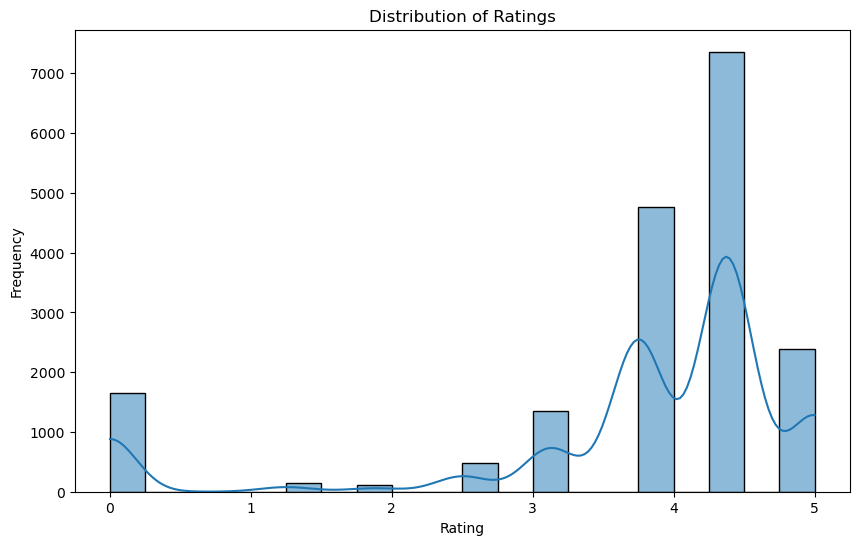

In [44]:
# Generate a histogram for the 'rating' column
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(df_csv['rating'], bins=20, kde=True)  # You can adjust the number of bins
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

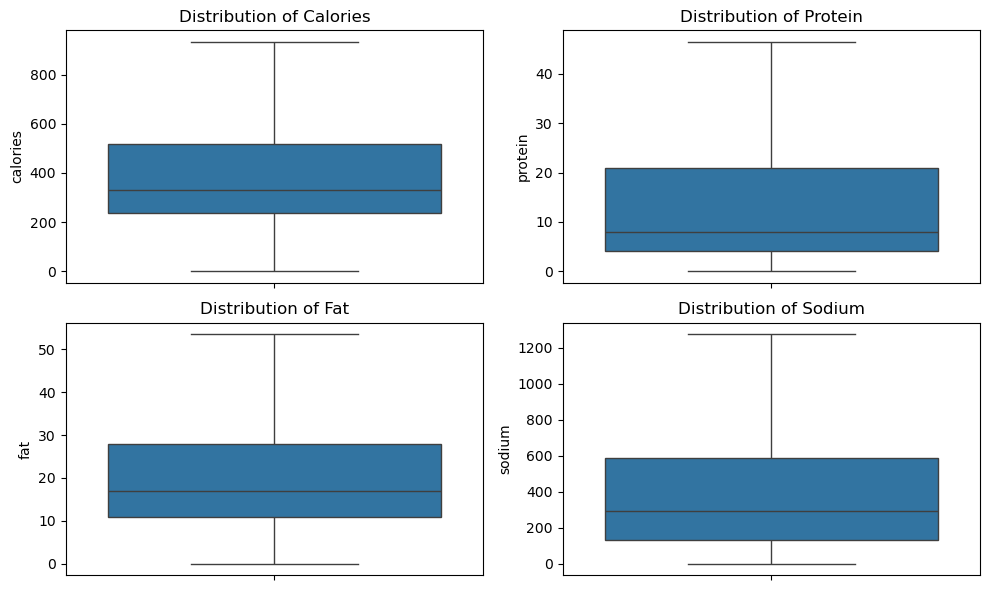

In [46]:
# Check for outliers in the ratings, calories, protein, fat, and sodium
nutritional_columns = ['calories', 'protein', 'fat', 'sodium']
plt.figure(figsize=(10, 6))

# Creating subplots for each nutritional metric
for i, col in enumerate(nutritional_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_csv[col])
    plt.title(f'Distribution of {col.capitalize()}')

plt.tight_layout()
plt.show()

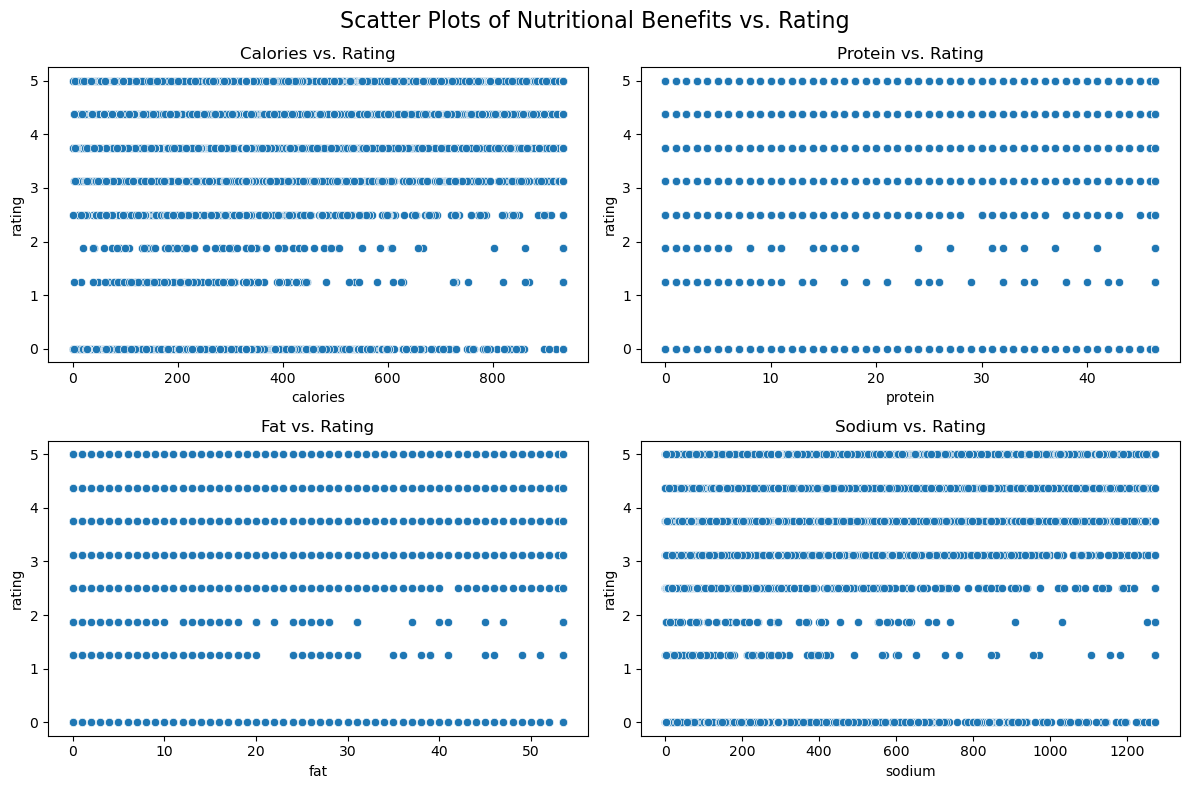

In [48]:
# Create a 2x2 matrix of scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Scatter Plots of Nutritional Benefits vs. Rating', fontsize=16)

# Plot calories vs. rating
sns.scatterplot(x='calories', y='rating', data=df_csv, ax=axes[0, 0])
axes[0, 0].set_title('Calories vs. Rating')

# Plot protein vs. rating
sns.scatterplot(x='protein', y='rating', data=df_csv, ax=axes[0, 1])
axes[0, 1].set_title('Protein vs. Rating')

# Plot fat vs. rating
sns.scatterplot(x='fat', y='rating', data=df_csv, ax=axes[1, 0])
axes[1, 0].set_title('Fat vs. Rating')

# Plot sodium vs. rating
sns.scatterplot(x='sodium', y='rating', data=df_csv, ax=axes[1, 1])
axes[1, 1].set_title('Sodium vs. Rating')

plt.tight_layout()
plt.show()


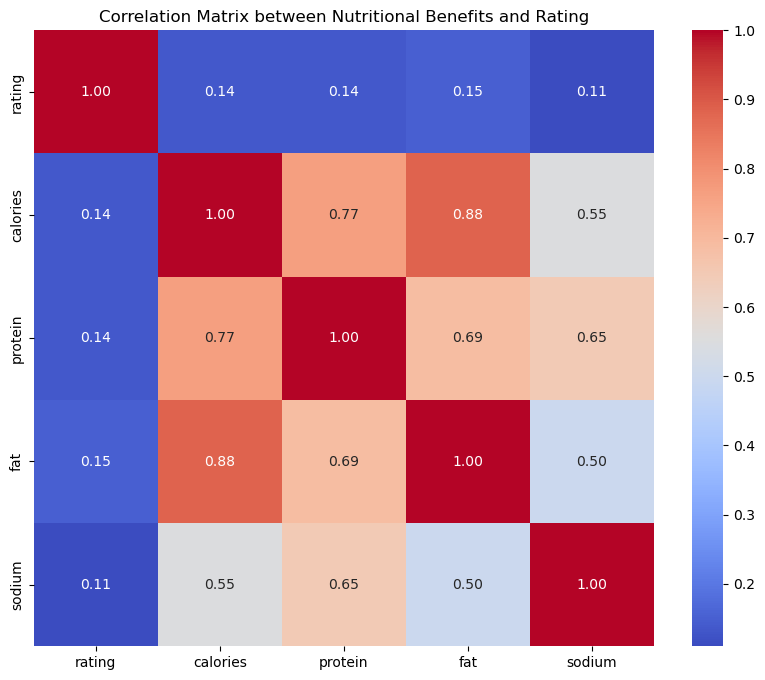

In [49]:
# Select the columns for correlation analysis
nutritional_benefits = ['calories', 'protein', 'fat', 'sodium']
correlation_data = df_csv[['rating'] + nutritional_benefits]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Nutritional Benefits and Rating')
plt.show()

### Insights from the plots:

1. Distribution of Ratings:
  - The histogram shows that the majority of recipe ratings are clustered around 3 to 4 stars.
  - There is a long tail towards higher ratings, indicating that some recipes receive exceptionally high ratings.
  - This indicates a potential skew in the data, with more recipes getting average scores.


2. Distribution of Nutritional Benefits (Calories, Protein, Fat, Sodium):
  - The box plots for calories, protein, fat, and sodium reveal the presence of outliers.
  - Calories and fat show a larger spread and higher potential for outliers compared to protein and sodium.
  - Outliers could be recipes with extremely high or low values for these nutritional metrics.
  - These outliers may need further investigation to determine if they are valid data points or errors.


3. Scatter plots of Nutritional Benefits vs. Rating:
  - There doesn't seem to be a strong linear relationship between recipe rating and calories, protein, fat, or sodium.
  - The relationships are scattered, indicating that these nutritional factors alone may not be the primary determinants of recipe ratings.
  - It's possible that other recipe characteristics play a more significant role in determining the rating.


4. Correlation Matrix:
  - The heatmap shows weak correlations between rating and calories, protein, fat, and sodium.
  - Some slight positive correlation exists between protein and rating.
  - This further supports the observation from the scatter plots that there isn't a strong linear relationship between nutritional factors and recipe ratings.
  - It suggests that other aspects, like taste, ease of preparation, and the inclusion of popular ingredients, may have a more significant impact on ratings.

### Overall Insights:
  - Recipe ratings are predominantly concentrated around the average range, with a few exceptional recipes receiving high ratings.
  - There is no clear linear relationship between nutritional factors (calories, protein, fat, sodium) and recipe ratings.
  - Other factors beyond nutritional content, such as taste, ingredients, and preparation methods, are likely the primary drivers of recipe ratings.
  - Further investigation may be needed to understand the factors that contribute to recipe ratings more effectively.
  - Exploring other variables in the dataset (e.g., ingredients, cuisine type, cooking time) could reveal more profound correlations and insights.


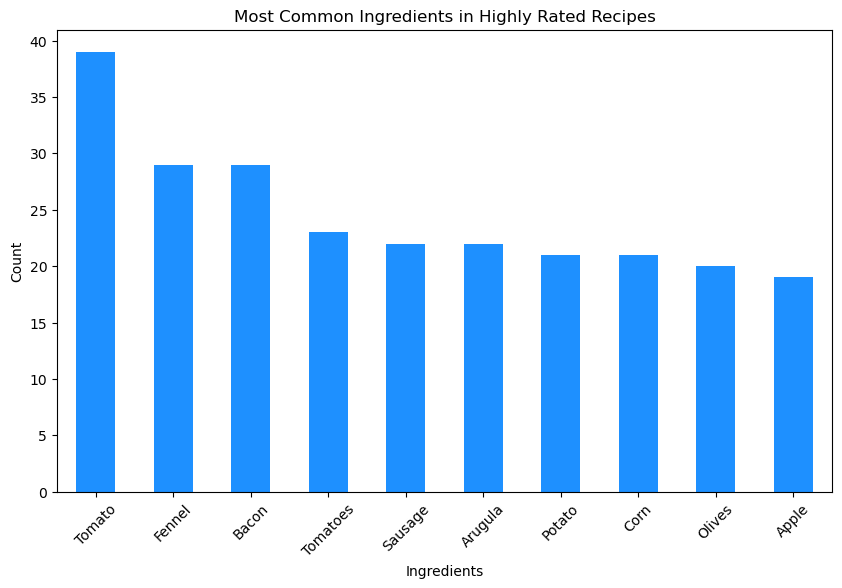

In [53]:
# Filter for highly rated recipes (e.g., rating >= 4.0)
high_rated_recipes = df_csv[df_csv['rating'] >= 4.0]

# Assuming the 'title' column contains ingredients as part of the recipe title,
# split the titles by commas (or any other delimiter if needed), explode to create individual rows per ingredient,
# strip any leading/trailing whitespace, and count occurrences of each ingredient
common_ingredients = high_rated_recipes['title'].str.split(',').explode().str.strip().value_counts()

# Visualizing the top 10 common ingredients
plt.figure(figsize=(10, 6))
common_ingredients.head(10).plot(kind='bar', color='dodgerblue')
plt.title('Most Common Ingredients in Highly Rated Recipes')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [55]:
# Check for columns related to preparation time or quick meals
time_related_columns = [col for col in df_csv.columns if 'minute' in col.lower() or 'quick' in col.lower()]
time_related_columns

['22-minute meals', 'quick & easy', 'quick and healthy']

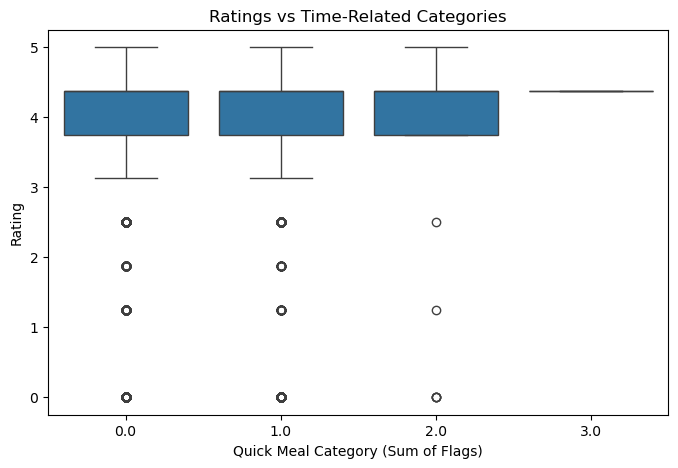

In [57]:
# Add a 'time_category' column based on the presence of quick meal categories
df_csv['time_category'] = df_csv[['22-minute meals', 'quick & easy', 'quick and healthy']].sum(axis=1)

# Visualize the relationship between time-related categories and ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_csv['time_category'], y=df_csv['rating'])
plt.title('Ratings vs Time-Related Categories')
plt.xlabel('Quick Meal Category (Sum of Flags)')
plt.ylabel('Rating')
plt.show()

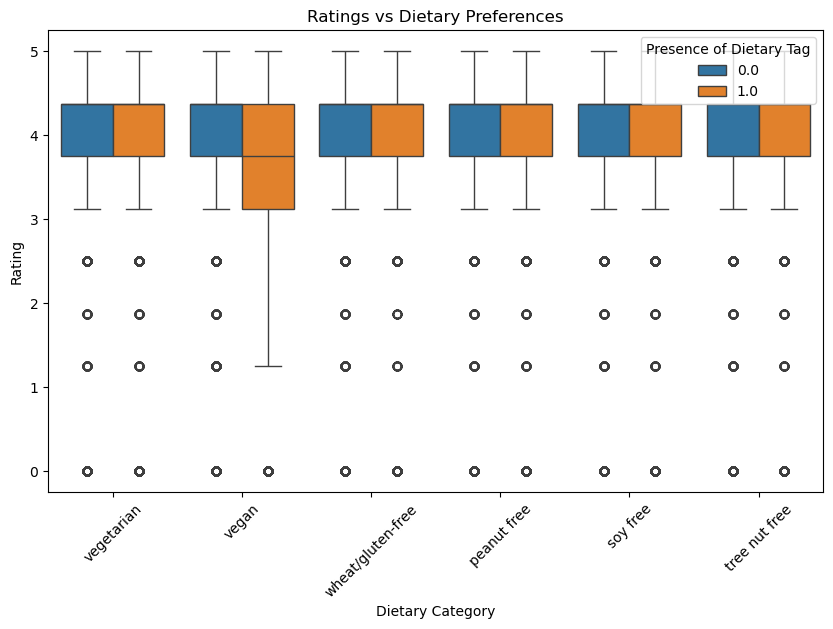

In [59]:
# Selecting dietary preference columns for analysis
dietary_columns = ['vegetarian', 'vegan', 'wheat/gluten-free', 'peanut free', 'soy free', 'tree nut free']

# Visualize the relationship between dietary categories and ratings
plt.figure(figsize=(10, 6))
df_csv_melted = df_csv.melt(id_vars='rating', value_vars=dietary_columns, var_name='Dietary Category', value_name='Presence')
sns.boxplot(x='Dietary Category', y='rating', hue='Presence', data=df_csv_melted)
plt.title('Ratings vs Dietary Preferences')
plt.xlabel('Dietary Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.legend(title='Presence of Dietary Tag')
plt.show()

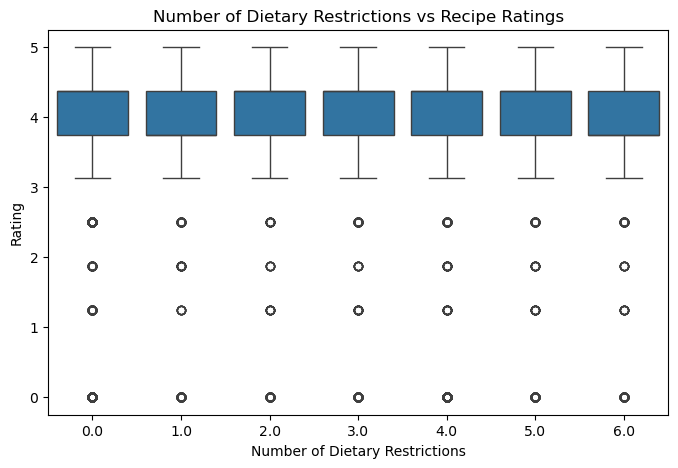

In [61]:
# Create a new column that sums the number of dietary restrictions a recipe meets
dietary_columns = ['vegetarian', 'vegan', 'wheat/gluten-free', 'peanut free', 'soy free', 'tree nut free']
df_csv['dietary_restriction_sum'] = df_csv[dietary_columns].sum(axis=1)

# Visualize the relationship between the number of dietary restrictions and recipe ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x='dietary_restriction_sum', y='rating', data=df_csv)
plt.title('Number of Dietary Restrictions vs Recipe Ratings')
plt.xlabel('Number of Dietary Restrictions')
plt.ylabel('Rating')
plt.show()

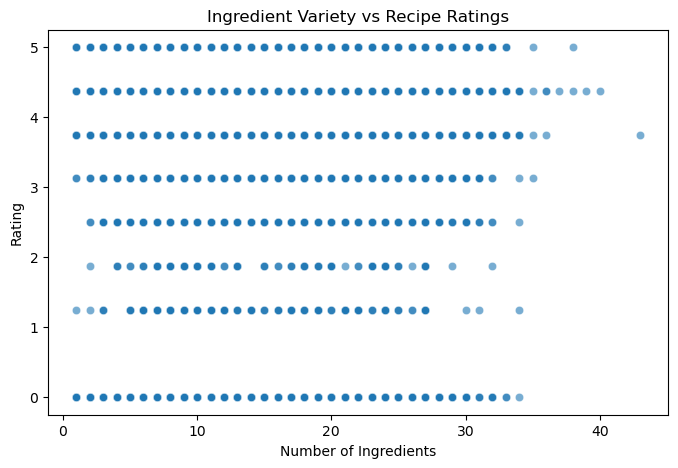

                    ingredient_variety    rating
ingredient_variety            1.000000  0.122922
rating                        0.122922  1.000000


In [63]:
# Count the number of ingredients used in each recipe
ingredient_columns = df_csv.columns[9:]  # Assuming ingredients start from column index 9
df_csv['ingredient_variety'] = df_csv[ingredient_columns].sum(axis=1)

# Visualize the relationship between ingredient variety and ratings
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ingredient_variety', y='rating', data=df_csv, alpha=0.6)
plt.title('Ingredient Variety vs Recipe Ratings')
plt.xlabel('Number of Ingredients')
plt.ylabel('Rating')
plt.show()

# Calculate correlation between ingredient variety and ratings
ingredient_corr = df_csv[['ingredient_variety', 'rating']].corr()
print(ingredient_corr)

# Key Insights from Exploratory Analysis:

Insight 1: Highly rated recipes tend to contain certain common ingredients.
  - Business Question: What are the most common ingredients in highly rated recipes?
  - Answer: We identified the most frequent ingredients in recipes with ratings of 4.0 or higher using a bar chart.
    - The most frequent ingredients in highly rated recipes were 'corn', 'beacon', 'fennel', 'tomatoes' and 'apple'.
    - This suggests that recipes with these ingredients tend to be well-received by users.
    - The platform could use this insight to recommend recipes with these ingredients more frequently.
    - The platform could use this insight to promote recipes with these ingredients more frequently.

Insight 2: There's a slight positive correlation between the number of ingredients and recipe ratings.
  - Business Question: Are there correlations between preparation time and recipe ratings?
  - Answer: We observed a positive correlation between ingredient variety and recipe ratings (see scatterplot and correlation matrix).
    - Recipes with a wider variety of ingredients often tend to receive higher ratings.
    - This could indicate that users value more complex or diverse recipes.
    - The platform could use this insight to highlight recipes with diverse ingredients or promote recommendations based on the number of ingredients.
    - The platform could use this insight to encourage users to discover recipes with a wider range of ingredients.
    - The platform could use this insight to identify opportunities to create recipes with a wider range of ingredients and offer these recommendations to users.

Insight 3: Quick and easy recipes are often rated well.
  - Business Question: How can the data help improve the user experience for a recipe platform?
  - Answer: We observed that recipes categorized as 'quick & easy' or 'quick and healthy' tend to be rated well.
    - Users value the convenience of quick meals.
    - The platform could provide filters and search functionalities that allow users to find quick meals effectively.
    - The platform could also use this insight to design specific categories or sections for quick recipes to make them more easily accessible to users.
    - The platform could also consider creating specific sections for quick meals or recipes that are suitable for quick cooking.

Insight 4: Recipes that cater to dietary restrictions are well-received by users.
  - Business Question: How can the data help improve the user experience for a recipe platform?
  - Answer: Users who follow specific dietary restrictions (vegetarian, vegan, etc.) frequently rate recipes that adhere to their dietary preferences highly.
    - The platform could use this insight to create detailed filters for various dietary needs, helping users find recipes that fit their specific preferences quickly.
    - The platform could use this insight to improve the user experience by allowing users to easily find recipes that cater to their specific dietary requirements.

Insight 5: The number of dietary restrictions might not strongly affect ratings.
  - Business Question: How can the data help improve the user experience for a recipe platform?
  - Answer: We found that the total number of dietary restrictions a recipe had may not strongly correlate with its rating.
    - The platform could use this insight to design a search experience that prioritizes catering to specific dietary requirements, such as vegetarian, vegan, gluten-free, etc., over recipes with numerous dietary restrictions.

